In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# An Introduction to Numerical Fourier Transforms #

We've already encountered Fourier transforms (FTs) in lecture, where we learned that they serve to *decompose a signal into individual frequency components.* For the continuous signals we've encountered so far the FT takes the form
\begin{align}
\tilde f(\omega) = \int dt \; e^{i\omega t} f(t) ,
\end{align}
where $f(t)$ is the input function we want to analyze and $\tilde f(\omega)$ is its FT, the output function which tells us about the frequency components of $f(t)$. 

In this exercise, we'll study the *discrete Fourier transform* or DFT, the discrete analog to the Fourier integrals we've already studied. In this context *discrete* simply means that our input functions are sampled at a finite number of data points (as in just about every real-world experiment), rather than continuously as in the integral above. Although we often carry out formal manipulations using continuous FTs, when we process numerical data (either from experiment or a simulation), we will rely on DFTs. In NumPy, the DFT of a vector $f_n$ is defined by the discrete sum
\begin{align}
F_k &= \sum_{n=0}^{N-1} e^{- 2\pi i \frac{k n}{N}} f_n .
\end{align}
Relative to the integral FT defined earlier, note three changes: 
* The integral has been replaced by a sum
* The continuous time index $t$ has been replaced by the discrete index $n$
* The continuous frequency index $\omega$ has been replaced by the discrete index $k$
* A factor of $(\frac{-2\pi}{N})$ has been added to the exponent. 

The first three of these changes are simply reflections of the essential change from continuous to discrete signals in moving from the FT to the DFT. The same goes for the addition of a factor of $\frac{2\pi}{N}$ to the exponent. The change in sign of the exponent is, however, merely a convention. Indeed, not all numerical packages define the DFT in the same way -- you should always check which sign is used in the exponent when performing numerical DFT calculations!

These changes in the definition of the DFT are paralleled by changes in the definition of the *inverse* DFT or IDFT. In NumPy the IDFT is defined by the sum
\begin{align}
f_n &= \frac{1}{N} \sum_{k=0}^{N-1} e^{2\pi i \frac{k n}{N}} F_k .
\end{align}
**Note the additional factor of $\frac{1}{N}$ relative to the continuous case.** This normalization factor is, again a consequence of the discrete nature of the transform and ensures that the IDFT truly ''undoes'' the data transformation performed by the DFT. 


## DFT Examples ##
To get a sense for how DFTs work in practice, let's look at some simple examples. We'll work first with a relatively small number (``N = 50``) of data points so that you can visualize the data more easily. We'll use NumPy's FFT module, which stands for ``fast fourier transform``. The FFT is a particular algorithmic representation of the DFT that allows the transform to be computed more quickly than calculating the sum directly. 


### Discrete Delta Functions -- forward and backward transforms ###

Start first with a signal vector ``f`` in which the first entry is set to 1 and all other entries are 0 -- a "discrete delta function". The code below plots the signal vector $f$ and the real (red) and imaginary (blue) parts of its DFT, along with the absolute value of the DFT. 

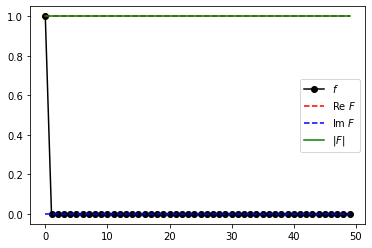

In [147]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import time
import numpy as np


# Set the number of data points
N = 50

# Set all elements to zero 
f = np.zeros((N))

# Make one of them non-zero 
f[0] = 1

# Calculate the FFT
F = np.fft.fft(f)

# Plot the results
plt.figure()
plt.plot(f, 'k-o')
plt.plot(np.real(F), 'r--')
plt.plot(np.imag(F), 'b--')
plt.plot(np.abs(F), 'g-')
plt.legend(['$f$', 'Re $F$', 'Im $F$', '$|F|$'])
plt.show()


As you can see, the DFT is, in this case, purely real, with $|F| = \text{Re }F = 1$. The imaginary part is uniformly zero. You can actually check this from the discrete sum we used to define the DFT, by simply noting that only the first term (proportional to $e^0 = 1$) will be non-zero. 


### Frequency components ###

What happens now when you change ``f`` such that only the *second* element ``f[1]`` is non-zero? What about when ``f[2]`` is non-zero? For small values of $n$, you should notice that the transformed function ``F`` completes *almost* $n$ complete sinusoidal cycles as the Fourier index $k$ is scanned from $0$ to $N-1$. In fact, it would return exactly to its initial value ``F[0]`` on the $N^\text{th}$ index, i.e., if we were to continue calculating values for indices $k>N-1$, we would find that $F[N] = F[0]$. (Note that the DFT is usually only defined for indices $0 \leq k \leq N-1$.) This behavior results from the fact that an input vector with only the $n^\text{th}$ element non-zero picks out the $n^\text{th}$ term in the DFT sum, proportional to $e^{2\pi i \frac{k n}{N}}$, which oscillates sinusoidally with a period of $N$ time points. 


Now, check what happens if you replace the call to np.fft.fft() to np.fft.ifft() -- i.e., replace the Fourier transform with the inverse transform. You should notice two things. First, the amplitude of the output vector ``F`` changes by a factor of $\frac{1}{N}$, a result of the different scaling conventions we noted earlier in the definitions of the DFT and IDFT. (You can correct this by multiplying the output from ``np.fft.ifft()`` by $N$.) Second, the imaginary part of $F$ changes sign -- a result of the changed sign in the exponent that constitutes the fundamental distinction between the forward and reverse transforms. The most important point to recognize here, however is that **these are the only changes** between the forward and inverse transforms. As a result, everything we say in the discussion below about DFTs could equally well be said by IDFTs -- with a sign change and corrected scaling. 

Note that, thanks to this symmetric relationship between ``f`` and ``F``, you can think equivalently of the components of ``F`` as telling you about the Fourier components of ``f`` **or** of the components of ``f`` as telling you about the Fourier components of ``F``. Thus a signal ``f`` with only the first element non-zero indicates a zero-frequency output ``F`` -- i.e. one that is constant in time. A signal vector ``f`` in which only ``f[1]`` is non-zero corresponds to an output vector ``F`` that contains only unit-frequency oscillations, i.e., that completes exactly one sinusoidal cycle as ``k`` ranges from $0$ to $N$. 


### Big = Negative? ###

Going back to computing the fft, what happens when only ``f[49]`` is non-zero? In this case, the FT oscillates slowly again, with a real part identical to the DFT obtained with ``f[1]`` non-zero. At first this might seem a bit surprising. After all, for small values of $n$ (in particular for $n<\frac{N}{2}$), we saw that the DFT (of the vector with only ``f[n]`` nonzero) oscillates more and more rapidly as $n$ increases. The behavior makes more sense if we re-write the $n^\text{th}$ Fourier component as 
\begin{align}
e^{2\pi i \frac{k n}{N}} = e^{2\pi i \frac{k (n-N)}{N}} e^{2\pi i \frac{kN}{N}}.
\end{align}
The last factor here is just $e^{2\pi i k} = 1$, independent of the value of $k$. As a result, when $n$ is close to $N$, the oscillation frequency of the DFT is set not by $n$ itself but by the {\it difference} $n-N$. Since $n-N<0$, this also implies that the imaginary part of the DFT will have the same frequency but opposite sign as the DFT of the signal vector with only ``f[N-n]`` nonzero. 


### Frequency Axes in DFTS ###
Intuitively, you can understand these results better by envisioning a frequency axis for the Fourier-transformed signals ``F`` that starts at zero, increases linearly up until $\frac{N}{2}$, and then *jumps discontinuously to* -$\frac{N}{2}$ before continuing to increase linearly at the original rate. In fact, NumPy includes a built-in function fft.fftfreq() that automatically generates just such an axis for a given number of points. The cell below plots this frequency axis for our example. 

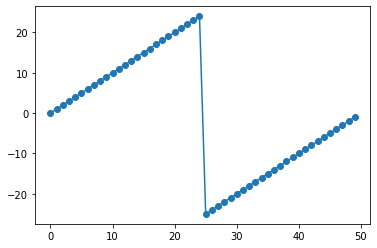

In [3]:
Faxis = N*np.fft.fftfreq(N)
plt.figure()
plt.plot(Faxis, 'o-')
plt.show()

Remember: The $n^\text{th}$ entry in this frequency axis tells you how many oscillations you would see in the DFT of a vector where only the $n^\text{th}$ entry was non-zero. Positive frequencies tell you the sign on the imaginary part of the Fourier transform: positive values mean that the imaginary part will initially slope *down* as a function of ``k``, while negative values mean that the imaginary part will initially slope *up*. 


### Axes again -- But this time with units! ###

So far we've talked about our input and output vectors as pure numerical values, without units. In processing real signals, we're usually interested in unit-ful quantities like an electric field or polarization vector as a function of time. How does the DFT incorporate units into its calculations? 

In short: it doesn't. If you want units, you'll have to add them yourself. As far as the computer is concerned, the DFT is a purely numerical operation on unitless quantities. Fortunately, inferring the correct units isn't too difficult. Denote the units of our input vector as $[f]$ and assume that the input data is a function of time, measured in units of $[t]$. In other words, if we were to plot the input vector ``f`` with correct units, the $x$ axis would have units of $[t]$ and the $y$-axis would have units of $[f]$. We thus have the correspondence
\begin{align}
f_n \leftrightarrow f(n \delta t),
\end{align}
where $\delta t$ is the time-difference between consecutive sampling times. Then, for consistency with our definition of the *continuous* FT, the entries in the output vector ``F`` should have units of $[t][f]$, while the frequency axis should have units of $\frac{1}{[t]}$. 

So far, so good. But, like the input vector $f_n$, our DFT frequency axis is sampled at discrete time points. What is the frequency spacing between them? To find out, consider a signal whose *output vector* ``F`` is real and is non-zero only at index $n=1$. From our earlier examples, we know that this corresponds to an *input vector* which completes exactly one oscillation across the sampled time axis -- corresponding in the continuous case to a total "time window" of $T = N \cdot \delta t$. The linear *frequency* of this signal should thus be just $\frac{1}{T} = \frac{1}{N \cdot \delta t}$. Therefore, while the *first* component of the output vector $F[0]$ represents the zero-frequency Fourier component, the *second* component corresponds to a Fourier component with frequency $\delta \nu = \frac{1}{N \cdot \delta t}$. Since our frequency axis is sampled uniformly in time, this means that the $k^{th}$ DFT component corresponds to a continuous FT component of frequency $\nu = k \cdot \delta \omega = \frac{k}{N\cdot \delta t}$. Note, however, that this is a *linear* frequency axis. The *angular frequency* $\omega$ in our FT definition can be calculated from the usual relation 
\begin{align}
\omega = 2\pi \nu .
\end{align}

### FTs in Spectroscopy ###

As a simple example relevant to spectroscopy, suppose we're conducting a pulsed laser experiment where the electric field profile of our laser (along the $y$-axis, for concreteness) takes a Gaussian form
\begin{align}
E(t) = e^{-\frac{(t-t_o)^2}{2 \sigma^2 }} \cos \omega_o t.
\end{align}
In a discrete simulation, we would sample this field as a vector with, say, $N$ discrete points. For example, suppose $t_o = 500$ fs, $\sigma = 15$ fs, and with time points equally spaced with $\delta t = 5$ fs over a total time window of $T = 1$ ps. The sampled field could then be stored in a vector ``E`` defined as follows:

In [4]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import time
import numpy as np

to = 500e-15
tmax = 1e-12
dt = 5e-15
N = int(tmax/dt)

c = 2.9979e+10 # Speed of light in cm/s
sigma = 15e-15
vo = 1650.0    # Pulse frequency in 1/cm
wo = 2.0*math.pi*vo*c

taxis = dt*np.arange(0,N)
E = np.exp(-((taxis-to)**2)/(2*sigma*sigma))*np.cos(wo*taxis)

The vector ``taxis`` represents a time axis for our simulation, while ``E`` represents the electric field sampled at the corresponding time points. Let's take a look now at the DFT of this field. We'll first plot just the absolute value of the DFT, on a frequency axis marked in cm$^{-1}$:

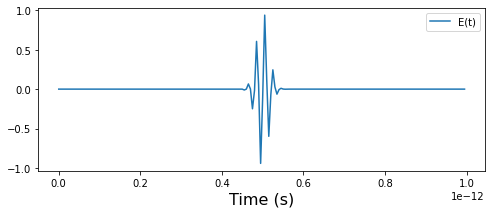

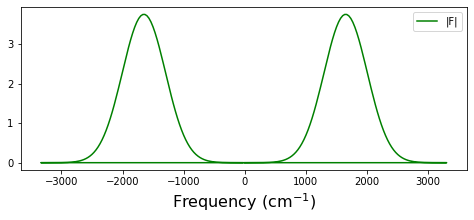

In [5]:
plt.figure(figsize=(8,3))
plt.plot(taxis, E)
plt.legend(['E(t)'])
plt.xlabel('Time (s)', fontsize=16)

fE = np.fft.fft(E)
df = 1.0/(N*dt)
faxis = np.fft.fftfreq(N)/dt
vaxis = faxis/c

plt.figure(figsize=(8,3))
plt.plot(vaxis, np.abs(fE), 'g')
plt.legend(['|F|'])
plt.xlabel('Frequency (cm$^{-1}$)', fontsize=16)
plt.show()

Note that the Fourier spectrum has two peaks, symmetrically arranged around $\nu = 0$. This is due to the fact that our input field $E(t)$ was a real function and due to the fundamental symmetry relation $\tilde f(\omega) = \left [\tilde f(-\omega) \right]^*$ for the FTs of real functions. (Notice also that there appears to be a baseline at $|F|=0$ all the way across the bottom of our wondow. This is because our frequency axis begins at zero and then "wraps around" to negative numbers as in the fft.fftfreq() plot earlier in our code.)

What happens to the profile when you change the pulse frequency? What about the temporal width $\sigma$? Are the temporal widths and the frequency-space widths directly or inversely proportional to each other? 

Finally, change the plot to show the real part of the field. What happens to the oscillation frequency of the FT as the pulse moves nearer and farther from $t_o = 0$? How does this relate to what we saw earlier for delta-function FTs? 

# Hearing Fourier Transforms

Audio signals provide a nice platform for building your intuitive understanding of what a Fourier transform represents. As you may know, the audio signals coming from your computer speaker are generated by the physical oscillation of a driven speaker drum in response to a prescribed magnetic field. The Python display module provides an interface for generating audio signals using NumPy arrays: a given "drive signal" (e.g., a sine wave) is generated as a NumPy array, translated to a corresponding analog electrical signal by your sound card, and then used to drive the oscillations of your computer speakers to generate an audible output. Comparing the *sounds* generated by a given NumPy signal with its numerical *Fourier transform* provides a useful intuitive link between what may otherwise seem a woefully abstract operation. 

The links below will take you to Notebook Apps that generate audio signals with a variety of functional forms relevant to spectroscopy and plot both the driving signal and its Fourier transforms. First spend some time exploring the apps and then, for your homework, use them to answer the questions below. 

[Frequency and Phase](frequency_phase.ipynb)

[Gaussian Pulses](gauss_pulse.ipynb)

[Chirped Pulses](chirp_pulse.ipynb)


# Homework

To generate your homework file for this week, enter your Purdue user name (e.g., something like "jsmith") in the text box below and click "Copy Exercise". This will automatically copy the assignment to your local directory. Simply click on the generated link to open the file. You can then download the file directly from you MOLSPEC/local directory. 

In [ ]:
import ipywidgets as widgets
import os
from IPython.display import display
from IPython.display import display_markdown


def copy_exercise(self):
    uname = txt_uname.value.replace(" ", "_").lower()
    #fpath = "~/MOLSPEC/local/"
    fpath = "../../../../local/"
    fname = "exercise2_" + uname + ".ipynb"
    
    
    if len(uname)<=0:
        print('Please enter a valid user name!')
    elif os.path.isfile(fname) and cb_overwrite.value==False:
        print('The file already exists! To overwrite check the \"Overwrite Existing\" box and try again.')
    else:
        out = !{"cp exercise2.ipynb " + fpath+fname}
        if len(out)>0:
            for line in out:
                print(out)
        else:
            FancyText = "Successfully copied exercise to local directory!<br> Click [here](" + fpath + fname + ") to open."
            display_markdown(FancyText, raw=True)
    
txt_uname = widgets.Text(
    value='',
    placeholder='User name',
    description='Purdue ID:',
    disabled=False
)


bt_genfile = widgets.Button(
    description='Copy Exercise',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Enter your username and then click to create a local exercise file'
)



cb_overwrite = widgets.Checkbox(
    value=False,
    description='Overwrite Existing?',
    disabled=False
)


bt_genfile.on_click(copy_exercise)

display(widgets.HBox([txt_uname, bt_genfile, cb_overwrite]))


